# TPC1: Análise de dados: doença cardíaca

Descarregue o ficheiro de dados: `myheart.csv`
Crie um programa em Python, conjunto de funções, que responda às seguintes questões:
* Crie uma função que lê a informação do ficheiro para um modelo, previamente pensado em memória;
* Pense num modelo para guardar uma distribuição;
* Crie uma função que calcula a distribuição da doença por sexo;
* Crie uma função que calcula a distribuição da doença por escalões etários. Considere os seguintes escalões: [30-34], [35-39], [40-44], ...
* Crie uma função que calcula a distribuição da doença por níveis de colesterol. Considere um nível igual a um intervalo de 10 unidades, comece no limite inferior e crie os níveis necessários até abranger o limite superior;
* Crie uma função que imprime na forma de uma tabela uma distribuição;
* Especifique um programa que ao executar apresenta as tabelas correspondentes às distribuições pedidas;
* Extra: explore o módulo matplotlib e crie gráficos para as suas distribuições.

#### Bibliotecas Utilizadas

In [64]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

print('\u2713', 'All libraries imported')

✓ All libraries imported


#### 1: Crie uma função que lê a informação do ficheiro para um modelo, previamente pensado em memória

In [65]:
def load_data(file):
    df = pd.read_csv(file)
    return df 

load_data('myheart.csv')

,idade,sexo,tensão,colesterol,batimento,temDoença
0,40,M,140,289,172,0
1,49,F,160,180,156,1
2,37,M,130,283,98,0
3,48,F,138,214,108,1
4,54,M,150,195,122,0
...,...,...,...,...,...,...
834,44,M,120,220,170,0
835,54,M,110,239,126,1
836,65,M,135,254,127,1
837,57,M,150,168,174,0


#### 2&6: Pense num modelo para guardar uma distribuição e crie uma função que imprime na forma de uma tabela uma distribuição; 

In [66]:
class distribution:
    def __init__(self, data, name='Distribution'):
        # data should be a list of tuples
        # where first element is the value and second element is the frequency
        self.data = data
        # name of the distribution 
        self.name = name
    
    def __str__(self):
        # header
        table=f"""{self.name}:
*---------------------------*
|    Value    |  Frequency  |
*---------------------------*"""
        # values
        self.data.sort(key=lambda x: x[0])
        for value, freq in self.data:
            table += f"""
| {value.center(11," ")} |  {freq:.7f}  |"""
        # end
        table += f"""
*---------------------------*"""
        return table

# Example Distribution Table
a = distribution([('A', 0.3), ('B', 0.7)], 'My Distribution')
print(a)

My Distribution:
*---------------------------*
|    Value    |  Frequency  |
*---------------------------*
|      A      |  0.3000000  |
|      B      |  0.7000000  |
*---------------------------*


#### 3: Crie uma função que calcula a distribuição da doença por sexo

In [67]:
def dist_by_sex(df):
    total = 0
    m=0
    f=0
    for index,row in df.iterrows():
        if row['temDoença']==1 and row['sexo']=='M':
            m+=1
            total+=1
        elif row['temDoença']==1:
            f+=1
            total+=1
    dist=distribution([('M',m/total),('F',f/total)], "Distribution of disease by sex")
    return dist

print(dist_by_sex(load_data('myheart.csv')))

Distribution of disease by sex:
*---------------------------*
|    Value    |  Frequency  |
*---------------------------*
|      F      |  0.0854701  |
|      M      |  0.9145299  |
*---------------------------*


#### 4: Crie uma função que calcula a distribuição da doença por escalões etários. Considere os seguintes escalões: [30-34], [35-39], [40-44], ...

In [68]:
def dist_by_age(df):
    total = 0
    dt={}
    for index,row in df.iterrows():
        if row['temDoença']==1:
            amin=row['idade']//10*10
            if row['idade']%10>=5:
                amin+=5
            if amin not in dt.keys():
                dt[amin]=1
            else:
                dt[amin]+=1
            total+=1
    dist=distribution([(f"[{key},{key+4}]",dt[key]/total) for key in dt.keys()], "Distribution of disease by age")
    return dist

print(dist_by_age(load_data('myheart.csv')))

Distribution of disease by age:
*---------------------------*
|    Value    |  Frequency  |
*---------------------------*
|   [30,34]   |  0.0128205  |
|   [35,39]   |  0.0405983  |
|   [40,44]   |  0.0576923  |
|   [45,49]   |  0.1089744  |
|   [50,54]   |  0.1773504  |
|   [55,59]   |  0.2435897  |
|   [60,64]   |  0.2158120  |
|   [65,69]   |  0.0961538  |
|   [70,74]   |  0.0363248  |
|   [75,79]   |  0.0106838  |
*---------------------------*


#### 5: Crie uma função que calcula a distribuição da doença por níveis de colesterol. Considere um nível igual a um intervalo de 10 unidades, comece no limite inferior e crie os níveis necessários até abranger o limite superior

In [69]:
def dist_by_col(df):
    total = 0
    dt={}
    for index,row in df.iterrows():
        if row['temDoença']==1 and row['colesterol']!=0:
            col=row['colesterol']//10*10
            if col not in dt.keys():
                dt[col]=1
            else:
                dt[col]+=1
            total+=1
    dist=distribution([(f"[{key},{key+9}]",dt[key]/total) for key in dt.keys()], "Distribution of disease by age")
    return dist

print(dist_by_col(load_data('myheart.csv')))

Distribution of disease by age:
*---------------------------*
|    Value    |  Frequency  |
*---------------------------*
|  [100,109]  |  0.0031646  |
|  [110,119]  |  0.0094937  |
|  [120,129]  |  0.0063291  |
|  [130,139]  |  0.0031646  |
|  [140,149]  |  0.0063291  |
|  [150,159]  |  0.0094937  |
|  [160,169]  |  0.0189873  |
|  [170,179]  |  0.0316456  |
|  [180,189]  |  0.0253165  |
|  [190,199]  |  0.0348101  |
|  [200,209]  |  0.0601266  |
|  [210,219]  |  0.0917722  |
|  [220,229]  |  0.0759494  |
|  [230,239]  |  0.0791139  |
|  [240,249]  |  0.0664557  |
|  [250,259]  |  0.0569620  |
|  [260,269]  |  0.0759494  |
|  [270,279]  |  0.0569620  |
|  [280,289]  |  0.0822785  |
|  [290,299]  |  0.0443038  |
|  [300,309]  |  0.0379747  |
|  [310,319]  |  0.0253165  |
|  [320,329]  |  0.0126582  |
|  [330,339]  |  0.0253165  |
|  [340,349]  |  0.0158228  |
|  [350,359]  |  0.0031646  |
|  [360,369]  |  0.0031646  |
|  [380,389]  |  0.0063291  |
|  [390,399]  |  0.0063291  |
|  [400,

#### 7: Especifique um programa que ao executar apresenta as tabelas correspondentes às distribuições pedidas

In [70]:
def main():
    data=load_data('myheart.csv')
    print(dist_by_sex(data))
    print(dist_by_age(data))
    print(dist_by_col(data))

main()

Distribution of disease by sex:
*---------------------------*
|    Value    |  Frequency  |
*---------------------------*
|      F      |  0.0854701  |
|      M      |  0.9145299  |
*---------------------------*
Distribution of disease by age:
*---------------------------*
|    Value    |  Frequency  |
*---------------------------*
|   [30,34]   |  0.0128205  |
|   [35,39]   |  0.0405983  |
|   [40,44]   |  0.0576923  |
|   [45,49]   |  0.1089744  |
|   [50,54]   |  0.1773504  |
|   [55,59]   |  0.2435897  |
|   [60,64]   |  0.2158120  |
|   [65,69]   |  0.0961538  |
|   [70,74]   |  0.0363248  |
|   [75,79]   |  0.0106838  |
*---------------------------*
Distribution of disease by age:
*---------------------------*
|    Value    |  Frequency  |
*---------------------------*
|  [100,109]  |  0.0031646  |
|  [110,119]  |  0.0094937  |
|  [120,129]  |  0.0063291  |
|  [130,139]  |  0.0031646  |
|  [140,149]  |  0.0063291  |
|  [150,159]  |  0.0094937  |
|  [160,169]  |  0.0189873  |
|  [

#### Extra: explore o módulo matplotlib e crie gráficos para as suas distribuições

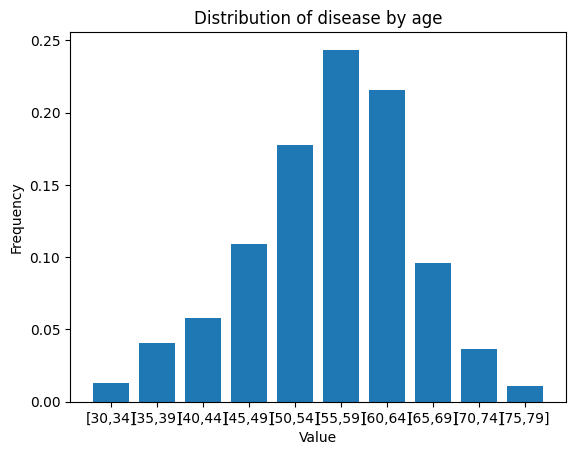

In [71]:
def plot_dist(dis):
    dis.data.sort(key=lambda x: x[0])
    val=np.array([x for x,y in dis.data])
    frq=np.array([y for x,y in dis.data])
    plt.bar(val,frq)
    plt.title(dis.name)
    plt.xlabel('Value')
    plt.ylabel('Frequency')
    plt.show()


data=load_data('myheart.csv')
plot_dist(dist_by_age(data))